# Download substations and power lines
## Download power stations, power lines for the German states: Lower Saxony, Brandenburg, Berlin and Mecklenburg-Vorpommern

In [1]:
from argparse import ArgumentParser
from json import load

import osmnx as ox
from pandas import concat

In [ ]:
parser = ArgumentParser(description='')
parser.add_argument('json', type=str, help='Full path to the json config file.')
args = parser.parse_args()

with open(args.json) as j:
    config = load(j)

In [2]:
states = ["Berlin", "Mecklenburg-Vorpommern", "Niedersachsen", "Brandenburg", ]
filters = ['geometry', 'power', 'ref', 'frequency', 'voltage', 'operator', ]

<AxesSubplot: >

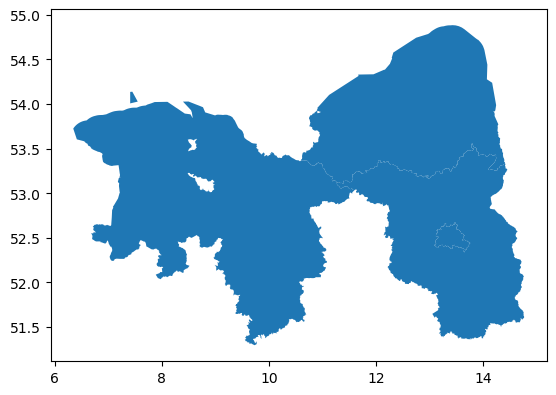

In [3]:
grids = []
for state in states:
    place_name = f"{state}, Germany"
    tags = {'power': 'line'}
    grids.append(ox.geocode_to_gdf(place_name))
grid = concat(grids)
grid.plot()

In [4]:
for state in states:
    place_name = f"{state}, Germany"
    line_tags = {'power': 'line'}
    grids = ox.geometries_from_place(place_name, line_tags)[filters]
    grids.to_crs(25833).to_file(f"{config['osm_save_path']}/grid_{state}.gpkg")

    station_tags = {'power': 'substation'}
    stations = ox.geometries_from_place(place_name, station_tags)[filters]
    stations.to_crs(25833).to_file(f"{config['osm_save_path']}/station_{state}.gpkg")

## Download for Germany

In [5]:
place_name = f"Germany"
line_tags = {'power': 'line'}
grids = ox.geometries_from_place(place_name, line_tags)[filters]
grids.to_crs(25833).to_file(f"{config['osm_save_path']}/grid_Germany.gpkg")

station_tags = {'power': 'substation'}
stations = ox.geometries_from_place(place_name, station_tags)[filters]
stations.to_crs(25833).to_file(f"{config['osm_save_path']}/station_Germany.gpkg")

In [6]:
station_tags = {'power': 'plant',
                'plant:source': 'wind',
                'type': 'site',
                'site': 'wind_farm'}
stations = ox.geometries_from_place(place_name, station_tags)

In [8]:
stations.head()

ele                  name public_transport  \
element_type osmid                                                   
way          190610688  NaN   Solarpark Herzmanns              NaN   
             309386404  NaN  Solarpark Bodelsberg              NaN   
             422968864  NaN                   NaN              NaN   
             459793300  NaN                   NaN              NaN   
             502523579  NaN                   NaN              NaN   

                       toilets:wheelchair website wheelchair  \
element_type osmid                                             
way          190610688                NaN     NaN        NaN   
             309386404                NaN     NaN        NaN   
             422968864                NaN     NaN        NaN   
             459793300                NaN     NaN        NaN   
             502523579                NaN     NaN        NaN   

                                                                 geometry  \
element_type osmid                                                          
way          190610688  POLYGON ((10.29453 47.64677, 10.29434 47.64673...   
             309386404  POLYGON ((10.46793 47.68972, 10.46690 47.68961...   
             422968864  POLYGON ((10.41526 47.66866, 10.41558 47.66761...   
             459793300  POLYGON ((10.36314 47.68917, 10.36366 47.68992...   
             502523579  POLYGON ((10.39924 47.68418, 10.39829 47.68380...   

                        ref playground tourism  ... heritage:since  \
element_type osmid                              ...                  
way          190610688  NaN        NaN     NaN  ...            NaN   
             309386404  NaN        NaN     NaN  ...            NaN   
             422968864  NaN        NaN     NaN  ...            NaN   
             459793300  NaN        NaN     NaN  ...            NaN   
             502523579  NaN        NaN     NaN  ...            NaN   

                       plant:input:electricity proposed:end_date  \
element_type osmid                                                 
way          190610688                     NaN               NaN   
             309386404                     NaN               NaN   
             422968864                     NaN               NaN   
             459793300                     NaN               NaN   
             502523579                     NaN               NaN   

                       substance:wikidata status source:plant ref:mastr  \
element_type osmid                                                        
way          190610688                NaN    NaN          NaN       NaN   
             309386404                NaN    NaN          NaN       NaN   
             422968864                NaN    NaN          NaN       NaN   
             459793300                NaN    NaN          NaN       NaN   
             502523579                NaN    NaN          NaN       NaN   

                       plant:output:cold_air seamark:restricted_area:category  \
element_type osmid                                                              
way          190610688                   NaN                              NaN   
             309386404                   NaN                              NaN   
             422968864                   NaN                              NaN   
             459793300                   NaN                              NaN   
             502523579                   NaN                              NaN   

                       name:ksh  
element_type osmid               
way          190610688      NaN  
             309386404      NaN  
             422968864      NaN  
             459793300      NaN  
             502523579      NaN  

[5 rows x 336 columns]

In [7]:
stations[filters].to_crs(25833).to_file(f"{config['osm_save_path']}/sea_wind_park.gpkg")

# Combine Data from the loaded files